In [2]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import seaborn as sns
from wordcloud import WordCloud
import re
from urllib.parse import urlparse
from tld import get_tld
import os.path
import pickle

In [2]:
urldf = pd.read_csv("C:/Users/asur2/Desktop/5337 project/combined.csv")

In [3]:
urldf.shape

(1002699, 2)

In [4]:
urldf.head()

,URLs,Labels
0,google.com,benign
1,br-icloud.com.br,phishing
2,http://www.garage-pirenne.be/index.php?option=...,defacement
3,http://adventure-nicaragua.net/index.php?optio...,defacement
4,http://www.pashminaonline.com/pure-pashminas,defacement


In [5]:
urldf.Labels.value_counts()

benign        727966
defacement     96456
phishing       94111
malware        84166
Name: Labels, dtype: int64

In [6]:
df_phi = urldf[urldf.Labels == "phishing"]
df_def = urldf[urldf.Labels == "defacement"]
df_mal = urldf[urldf.Labels == "malware"]
df_ben = urldf[urldf.Labels == "benign"]

In [7]:
df_phi.head()

,URLs,Labels
1,br-icloud.com.br,phishing
10,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing
11,http://www.marketingbyinternet.com/mo/e56508df...,phishing
15,https://docs.google.com/spreadsheet/viewform?f...,phishing
24,retajconsultancy.com,phishing


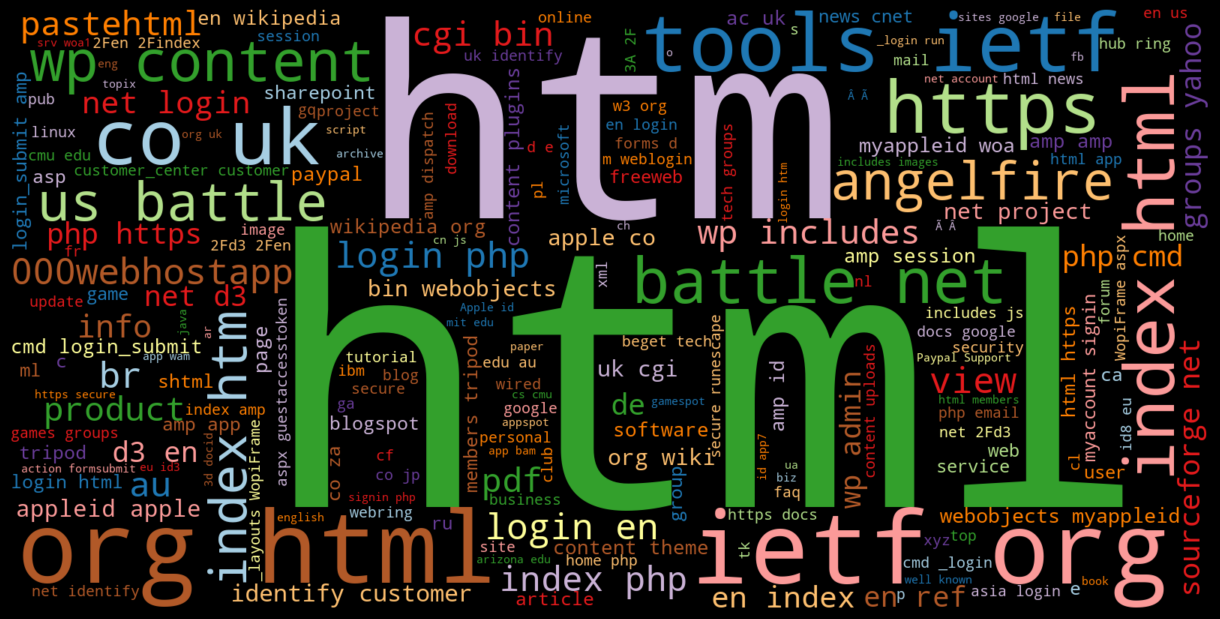

In [8]:
phi_url =" ".join(i for i in df_phi.URLs)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(phi_url)
plt.figure(figsize=(12, 14), facecolor='k') 
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

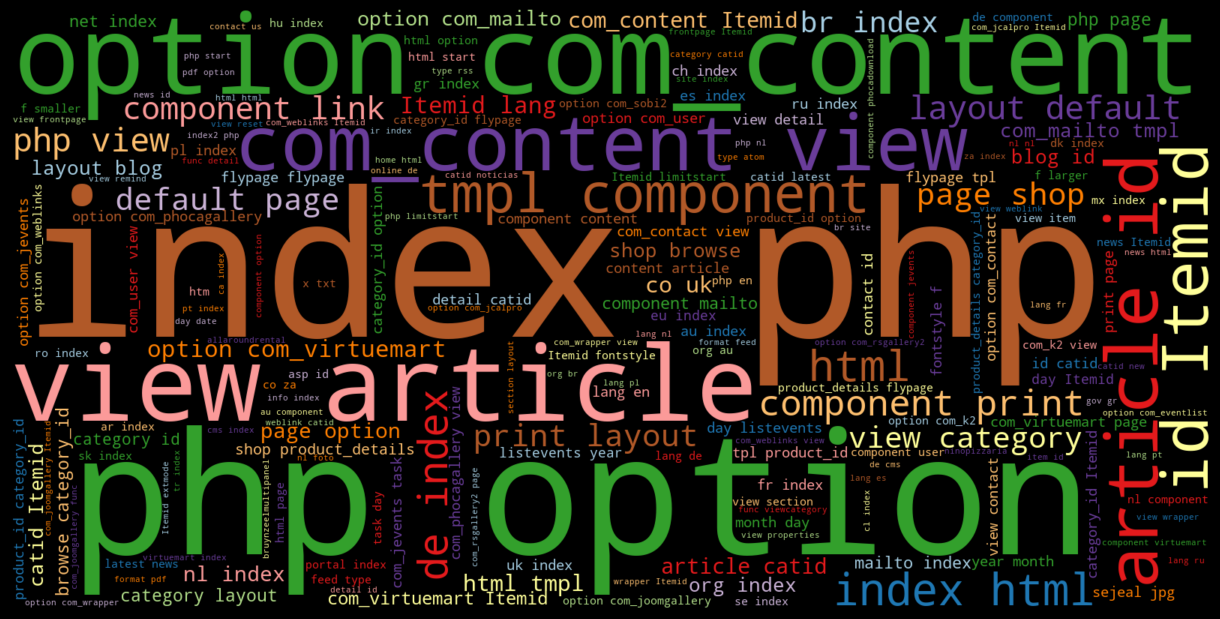

In [9]:
def_url =" ".join(i for i in df_def.URLs)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(def_url)
plt.figure(figsize=(12, 14), facecolor='k') 
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

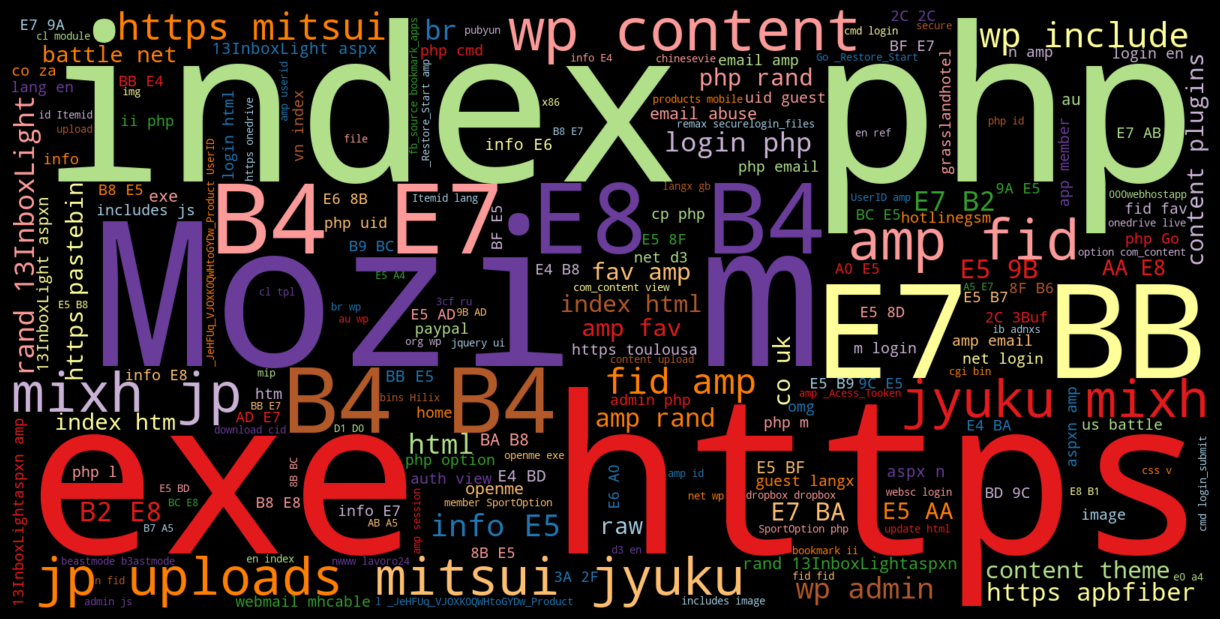

In [10]:
mal_url =" ".join(i for i in df_mal.URLs)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(mal_url)
plt.figure(figsize=(12, 14), facecolor='k') 
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

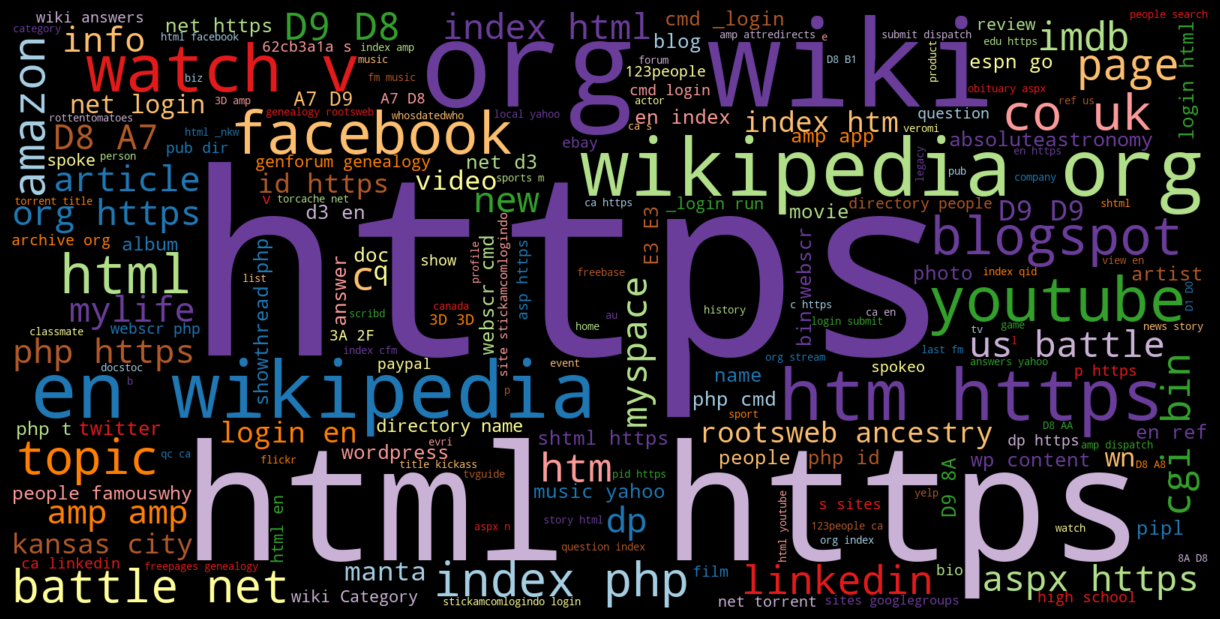

In [11]:
ben_url =" ".join(i for i in df_ben.URLs)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(ben_url)
plt.figure(figsize=(12, 14), facecolor='k') 
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
def if_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
urldf['use_of_ip'] = urldf['URLs'].apply(lambda i: if_ip_address(i))

In [13]:
urldf.head()

,URLs,Labels,use_of_ip
0,google.com,benign,0
1,br-icloud.com.br,phishing,0
2,http://www.garage-pirenne.be/index.php?option=...,defacement,0
3,http://adventure-nicaragua.net/index.php?optio...,defacement,0
4,http://www.pashminaonline.com/pure-pashminas,defacement,0


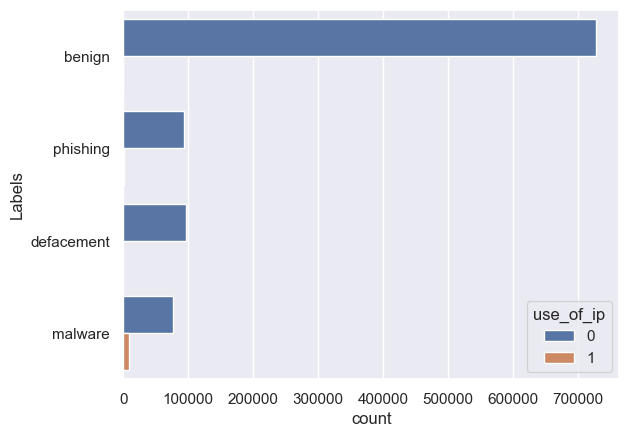

In [14]:
sns.set(style= "darkgrid")
ax = sns.countplot(y = 'Labels' , data = urldf, hue = 'use_of_ip')

In [15]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
urldf['count_dot'] = urldf['URLs'].apply(lambda i: count_dot(i))

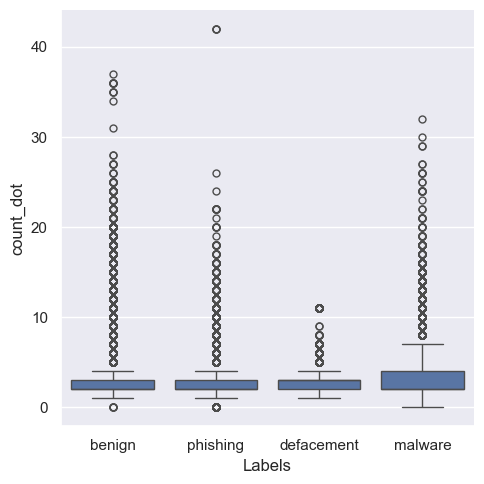

In [16]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_dot')

In [17]:
def count_www(url):
    url.count('www')
    return url.count('www')
urldf['count_www'] = urldf['URLs'].apply(lambda i: count_www(i))

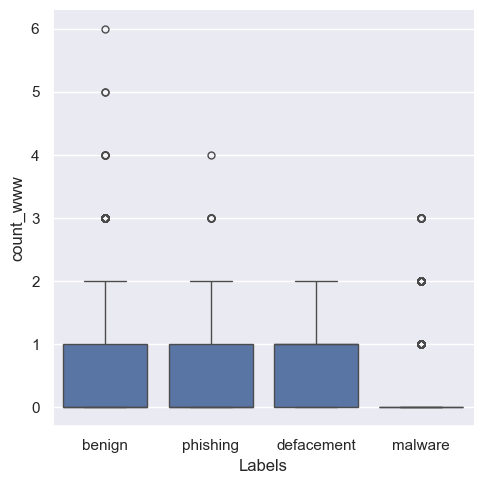

In [18]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_www')

In [19]:
def count_attherate(url):
     
    return url.count('@')
urldf['count_@'] = urldf['URLs'].apply(lambda i: count_attherate(i))

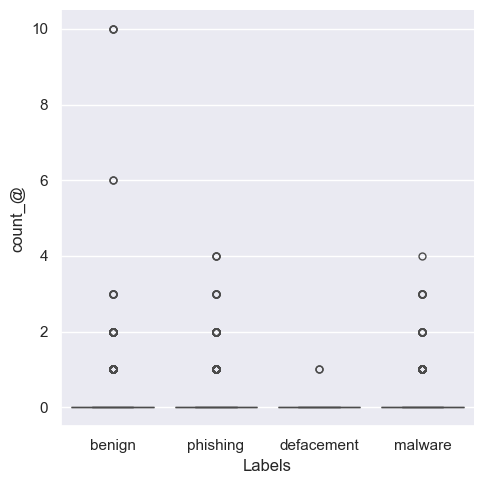

In [20]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_@')

In [21]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldf['count_dir'] = urldf['URLs'].apply(lambda i: no_of_dir(i))

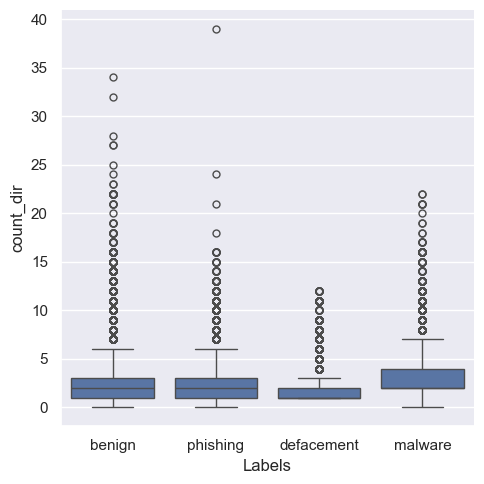

In [22]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_dir')

In [23]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
urldf['count_embed_domain'] = urldf['URLs'].apply(lambda i: no_of_embed(i))

In [24]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
urldf['short_url'] = urldf['URLs'].apply(lambda i: shortening_service(i))

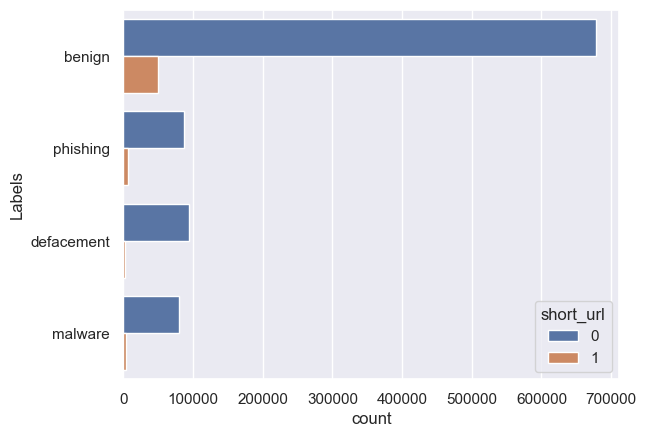

In [25]:
sns.set(style= "darkgrid")
ax = sns.countplot(y = 'Labels' , data = urldf, hue = 'short_url')

In [26]:
def count_http(url):
    return url.count('http')
urldf['count_http'] = urldf['URLs'].apply(lambda i : count_http(i))

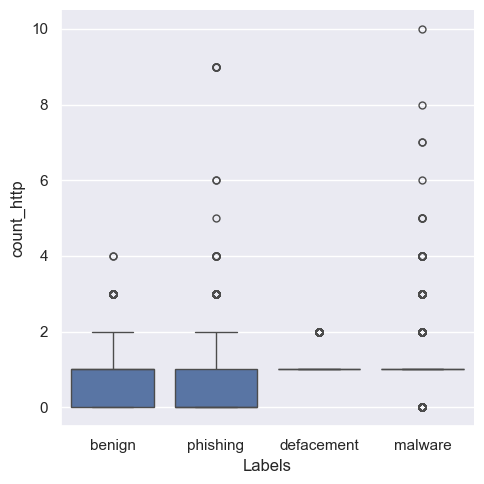

In [27]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_http')

In [28]:
def count_https(url):
    return url.count('https')
urldf['count_https'] = urldf['URLs'].apply(lambda i : count_https(i))

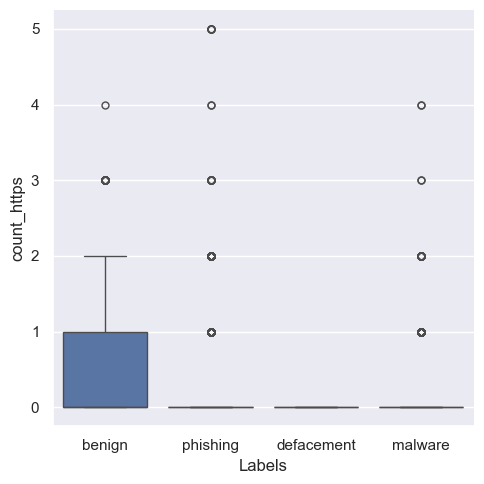

In [29]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_https')

In [30]:
def count_per(url):
    return url.count('%')
urldf['count_%'] = urldf['URLs'].apply(lambda i : count_per(i))

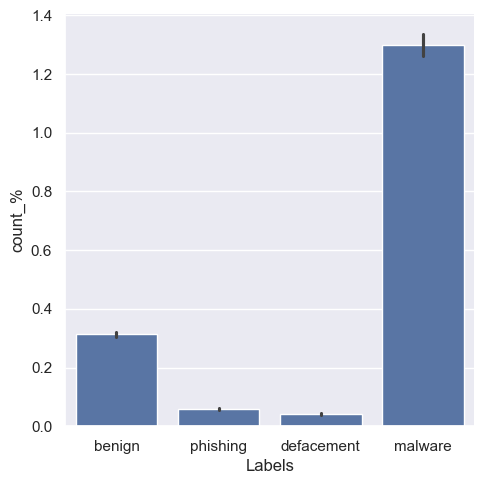

In [31]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'count_%')

In [32]:
def count_ques(url):
    return url.count('?')
urldf['count_?'] = urldf['URLs'].apply(lambda i : count_ques(i))

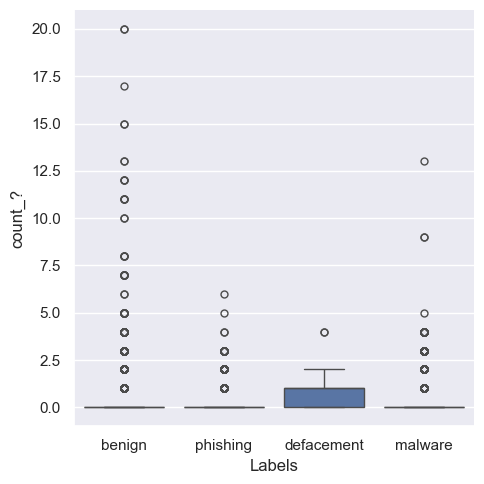

In [33]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_?')

In [34]:
def count_hyphen(url):
    return url.count('-')
urldf['count_-'] = urldf['URLs'].apply(lambda i : count_hyphen(i))

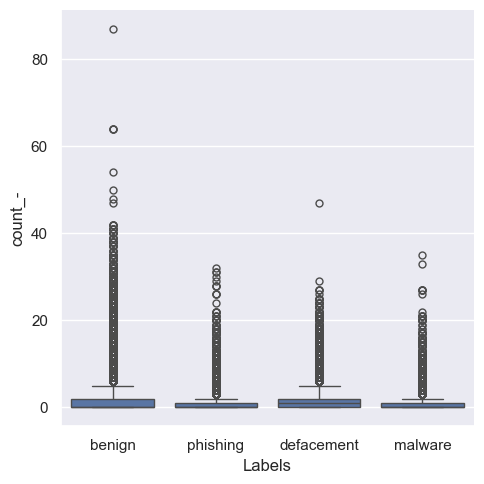

In [35]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_-')

In [36]:
def count_equal(url):
    return url.count('=')
urldf['count_='] = urldf['URLs'].apply(lambda i : count_equal(i))

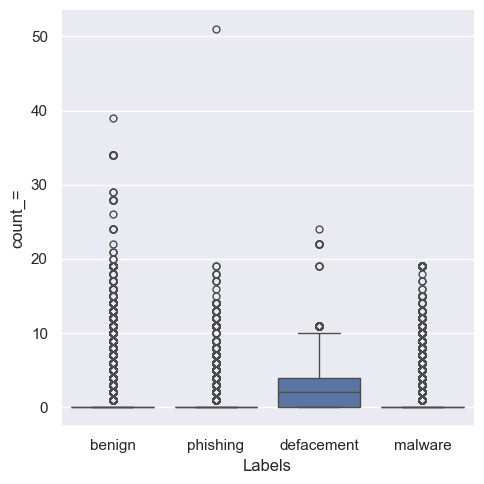

In [37]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'box' , data = urldf, y = 'count_=')

In [38]:
def url_length(url):
    return len(str(url))
#Length of URL
urldf['url_length'] = urldf['URLs'].apply(lambda i : url_length(i))

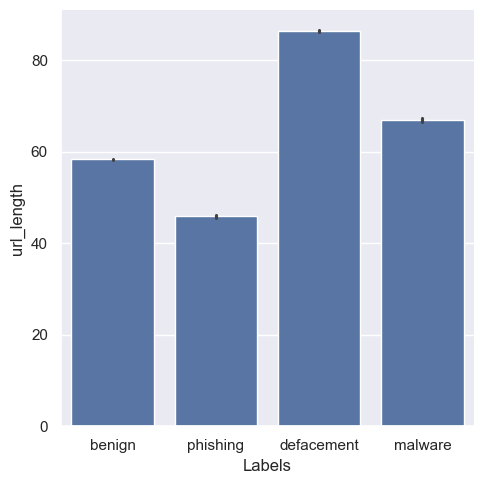

In [39]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'url_length')

In [40]:
def hostname_length(url):
    return len(urlparse(url).netloc)
urldf['hostname_length'] = urldf['URLs'].apply(lambda i : hostname_length(i))

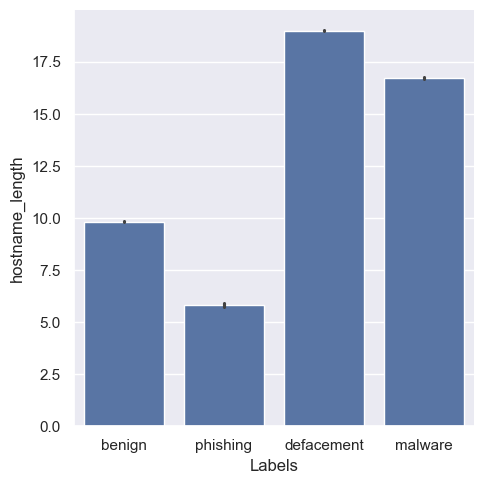

In [41]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'hostname_length')

In [42]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
urldf['sus_url'] = urldf['URLs'].apply(lambda i : suspicious_words(i))

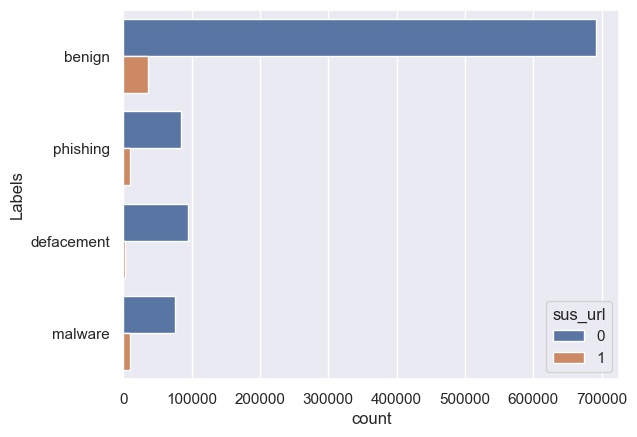

In [43]:
sns.set(style= "darkgrid")
ax = sns.countplot(y = 'Labels' , data = urldf, hue = 'sus_url')

In [44]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldf['count_digits']= urldf['URLs'].apply(lambda i : digit_count(i))

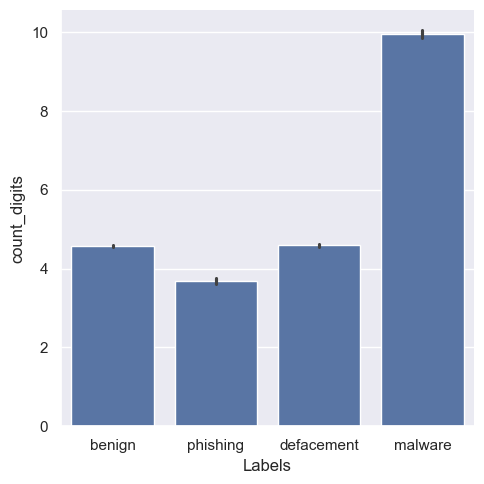

In [45]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'count_digits')

In [46]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldf['count_letters']= urldf['URLs'].apply(lambda i : letter_count(i))

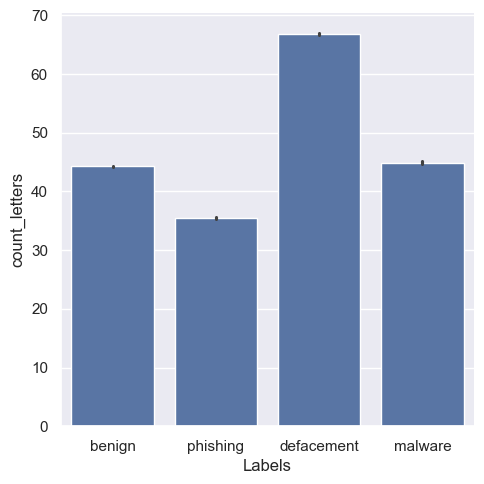

In [47]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'count_letters')

In [48]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
urldf['firdir_length'] = urldf['URLs'].apply(lambda i : fd_length(i))

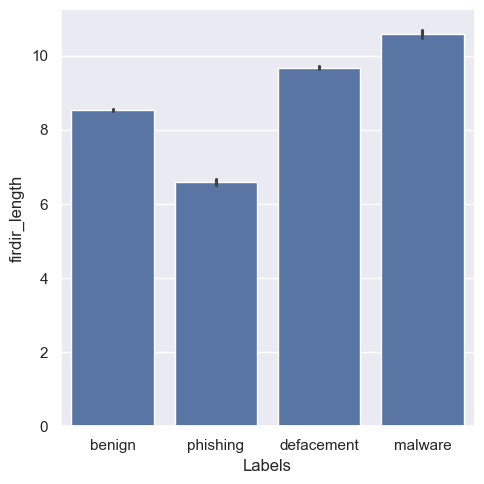

In [49]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'firdir_length')

In [50]:
urldf['toplvldmn'] = urldf['URLs'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
urldf['toplvldmn_length'] = urldf['URLs'].apply(lambda i : tld_length(i))

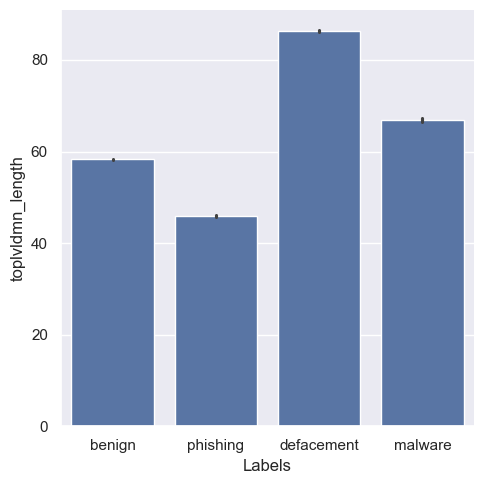

In [51]:
sns.set(style= "darkgrid")
ax = sns.catplot(x = 'Labels' , kind = 'bar' , data = urldf, y = 'toplvldmn_length')

In [52]:
lb_make = LabelEncoder()
urldf["type_code"] = lb_make.fit_transform(urldf["Labels"])
urldf.head()

,URLs,Labels,use_of_ip,count_dot,count_www,count_@,count_dir,count_embed_domain,short_url,count_http,...,count_=,url_length,hostname_length,sus_url,count_digits,count_letters,firdir_length,toplvldmn,toplvldmn_length,type_code
0,google.com,benign,0,1,0,0,0,0,0,0,...,0,10,0,0,0,9,0,None,10,0
1,br-icloud.com.br,phishing,0,2,0,0,0,0,0,0,...,0,16,0,0,0,13,0,None,16,3
2,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,0,1,0,0,1,...,4,88,21,0,7,63,9,be,88,1
3,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,0,1,0,0,1,...,3,235,23,0,22,199,9,net,235,1
4,http://www.pashminaonline.com/pure-pashminas,defacement,0,2,1,0,1,0,0,1,...,0,44,22,0,0,37,14,com,44,1


In [53]:
X = urldf[['use_of_ip', 'count_dot', 'count_www', 'count_@',
       'count_dir', 'count_embed_domain', 'short_url', 'count_https',
       'count_http', 'count_%', 'count_?', 'count_-', 'count_=', 'url_length',
       'hostname_length', 'sus_url', 'firdir_length', 'toplvldmn_length', 'count_digits',
       'count_letters']]

y = urldf['type_code']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,shuffle=True, random_state=5)

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.98      0.99      0.99    145464
  defacement       0.97      0.98      0.97     19195
    phishing       0.91      0.94      0.92     16910
     malware       0.88      0.80      0.84     18971

    accuracy                           0.97    200540
   macro avg       0.94      0.93      0.93    200540
weighted avg       0.97      0.97      0.97    200540



In [57]:
score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

accuracy:   0.967


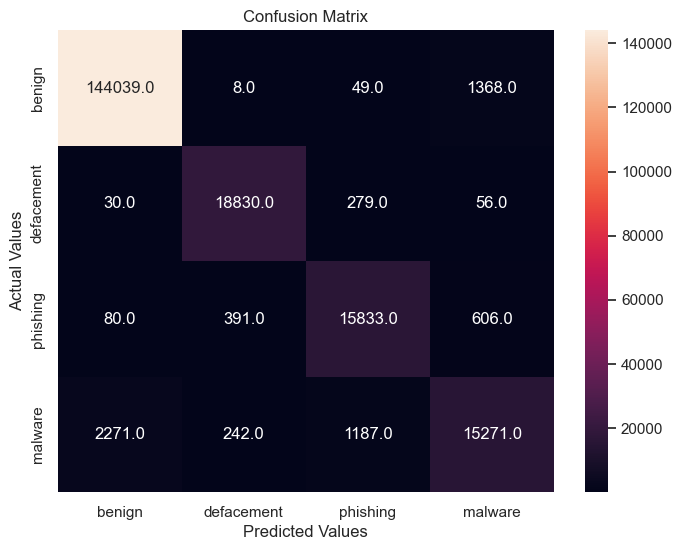

In [58]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [59]:
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_x,target_names=['benign', 'defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.98      0.99      0.99    145464
  defacement       0.95      0.97      0.96     19195
    phishing       0.88      0.92      0.90     16910
     malware       0.89      0.76      0.82     18971

    accuracy                           0.96    200540
   macro avg       0.92      0.91      0.92    200540
weighted avg       0.96      0.96      0.96    200540



In [61]:
score = accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

accuracy:   0.961


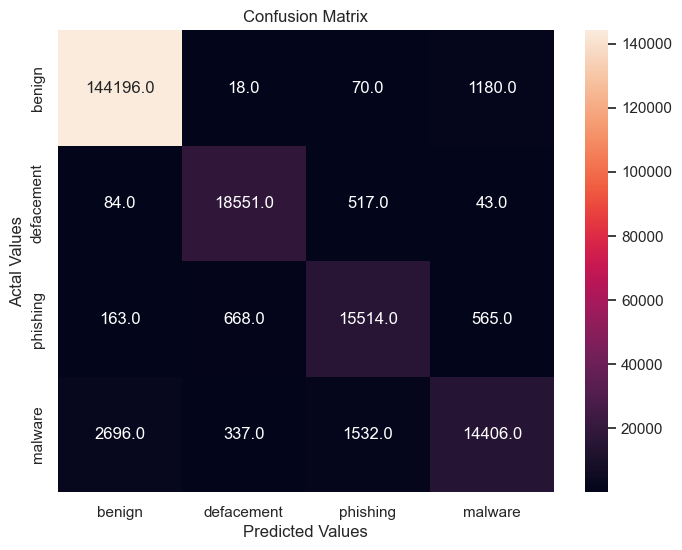

In [62]:
cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [63]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, random_state=5)
LGB_C = lgb.fit(X_train, y_train)
y_pred_lgb = LGB_C.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 802159, number of used features: 20
[LightGBM] [Info] Start training from score -0.319974
[LightGBM] [Info] Start training from score -2.340118
[LightGBM] [Info] Start training from score -2.478801
[LightGBM] [Info] Start training from score -2.367954


In [64]:
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.98      0.99      0.99    145464
  defacement       0.94      0.96      0.95     19195
    phishing       0.87      0.91      0.89     16910
     malware       0.88      0.75      0.81     18971

    accuracy                           0.96    200540
   macro avg       0.92      0.90      0.91    200540
weighted avg       0.96      0.96      0.96    200540



In [65]:
score = accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

accuracy:   0.958


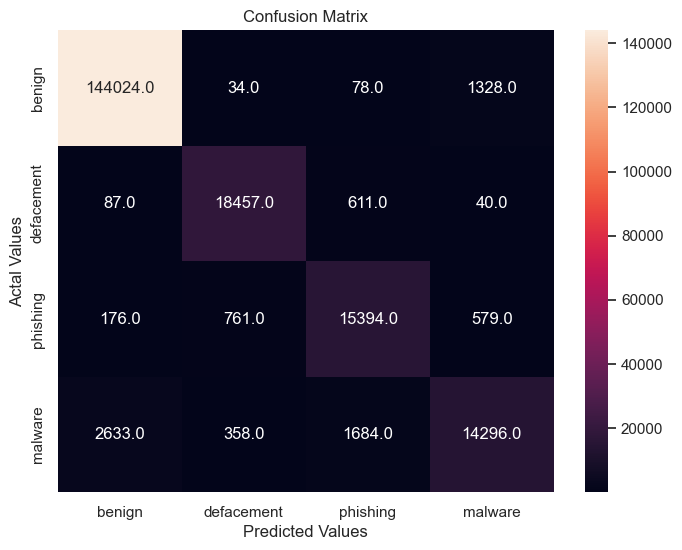

In [66]:
cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_scaled)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y , test_size=0.2,shuffle=True, random_state=5)

<AxesSubplot: >

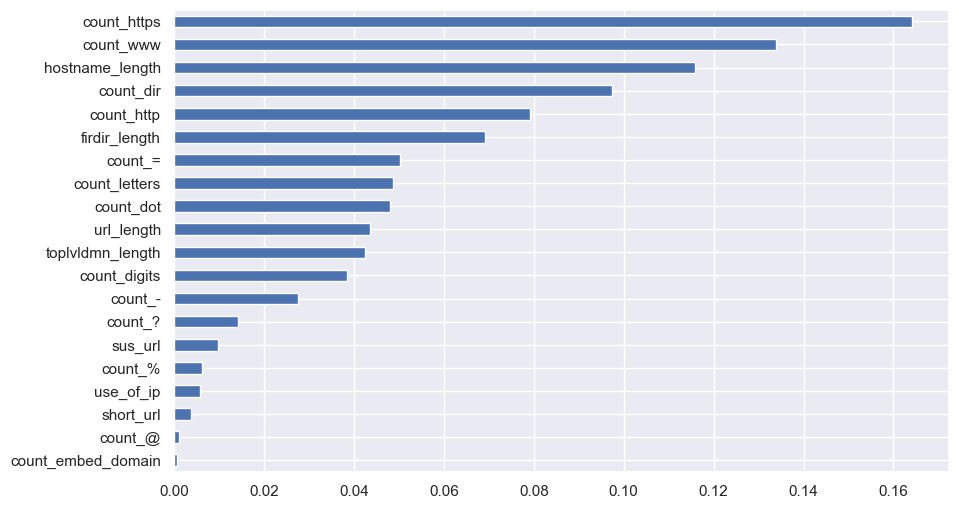

In [70]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [79]:
pickle.dump(xgb_c, open('model.pkl','wb'))

In [72]:
urldf.head()

,URLs,Labels,use_of_ip,count_dot,count_www,count_@,count_dir,count_embed_domain,short_url,count_http,...,count_=,url_length,hostname_length,sus_url,count_digits,count_letters,firdir_length,toplvldmn,toplvldmn_length,type_code
0,google.com,benign,0,1,0,0,0,0,0,0,...,0,10,0,0,0,9,0,None,10,0
1,br-icloud.com.br,phishing,0,2,0,0,0,0,0,0,...,0,16,0,0,0,13,0,None,16,3
2,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,0,1,0,0,1,...,4,88,21,0,7,63,9,be,88,1
3,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,0,1,0,0,1,...,3,235,23,0,22,199,9,net,235,1
4,http://www.pashminaonline.com/pure-pashminas,defacement,0,2,1,0,1,0,0,1,...,0,44,22,0,0,37,14,com,44,1


In [78]:
def get_prediction_from_url(url):
    with open('model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    tld = get_tld(url,fail_silently=True)
    features = [if_ip_address(url),count_dot(url),count_www(url),count_attherate(url),no_of_dir(url),no_of_embed(url),
                shortening_service(url),count_https(url),count_http(url),count_per(url),count_ques(url),count_hyphen(url),
                count_equal(url),url_length(url),hostname_length(url),suspicious_words(url),digit_count(url),letter_count(url),
                fd_length(url),tld_length(tld)]
    features = np.array(features).reshape((1, -1))
    pred = loaded_model.predict(features)
    
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2:
        res="MALWARE"
        return res
        
    elif int(pred[0]) == 3:
        
        res="PHISHING"
        return res

url = "http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15"
print(get_prediction_from_url(url))

# model_pipeline = {
#     'feature_extraction': main,
#     'model': lgb
# }

DEFACEMENT


In [74]:
url = "https://google.com"
# result = loaded_pipeline['feature_extraction'](url_to_predict)
prediction = get_prediction_from_url(url)
print(prediction)

PHISHING
